# Check firing rate of each neuron

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path
import numpy as np
import pandas as pd
from scipy import stats

from dataloader import BaseDataset
from utils.plot_utils import label_diff
from param import *

In [2]:

spikes_all = []
mouse_type_list = []
ratio_all = []
for data_dir in ParamDir().data_list:

    data_name = str(data_dir).split('/')[-1]
    mouse_type = "KO" if "KO" in data_name else "WT"
    dataset = BaseDataset(data_dir, False, ParamData().shuffle, ParamData().random_state)
    position = dataset._discretize_coords()

    # mean firing rate at each position
    n_time, n_neuron = dataset.spikes.shape
    spikes_all.extend(list((dataset.spikes.sum(axis=0))/(n_time/3)))
    mouse_type_list.extend([f"{mouse_type}"]*len(dataset.spikes.sum(axis=0)))



In [3]:
df_firing_rate_all = pd.DataFrame(spikes_all, columns=["firing rate"])
df_firing_rate_all["mouse type"] = mouse_type_list
means = df_firing_rate_all.groupby("mouse type").mean().values
errors = df_firing_rate_all.groupby("mouse type").max().values -.02
ind = [str(i+1) for i in range(len(means))]

plot_data = [
    df_firing_rate_all[df_firing_rate_all["mouse type"]=="KO"]["firing rate"], 
    df_firing_rate_all[df_firing_rate_all["mouse type"]=="WT"]["firing rate"]
    ]

In [7]:
stats.ttest_ind(plot_data[0], plot_data[1])

Ttest_indResult(statistic=4.956920667974125, pvalue=8.782940828382137e-07)

Text(0.5, 1.0, 'firing rate of each neuron')

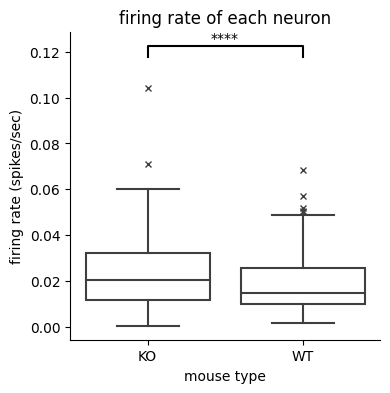

In [5]:
fig, ax = plt.subplots(figsize=(4,4))
sns.despine()

sns.boxplot([df_firing_rate_all[df_firing_rate_all["mouse type"]=="KO"]["firing rate"], df_firing_rate_all[df_firing_rate_all["mouse type"]=="WT"]["firing rate"]],
            ax=ax,
            boxprops={"facecolor": (0, 0, 0, 0)},
            flierprops={"marker": "x"})
label_diff(0, 1, "****", ind=[0,1], Y=means, errors=errors, ax=ax, barh=.005)

ax.set_xticklabels(["KO", "WT"])
ax.set_xlabel("mouse type")
ax.set_ylabel("firing rate (spikes/sec)")
ax.set_title("firing rate of each neuron")

